<a href="https://colab.research.google.com/github/Vinay-Kota-1/Baltimore-Crime-Data-Analysis/blob/main/C1_Vinay_Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capital One Data Challenge - Airline Analysis

## Problem Statement:

You are working for an airline company looking to enter the United States domestic market. Specifically, the company has decided to start with 5 round trip routes between medium and large US airports. An example of a round trip route is the combination of JFK to ORD and ORD to JFK. The airline company has to acquire 5 new airplanes (one per round trip route) and the upfront cost for each airplane is $90 million. The company’s motto is “On time, for you”, so punctuality is a big part of its brand image.

## Goal (Analysis)

1. **Data Pre-processing**
2. **Data Munging (Merging)**
3. **Analysis**
    1. The 10 busiest round trip routes in terms of number of round trip flights in the quarter.
    2. The 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter.   Along with the profit, show total revenue, total cost, summary values of other key components and total round trip flights in the quarter for the top 10 most profitable routes.
    3. The 5 round trip routes that you recommend to invest in.
    4. The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend.
    5. Key Performance Indicators (KPI’s) to track to measure the success


## Steps Involved

### - Data
### Step 1: Importing Necessary Libraries
### Step 2: Importing the data
### Step 3: Some generalized pre-defined functions
### Step 4: Data Pre-processing
### Step 5: Data Munging
### Step 6: Data Analysis & Visualization
### Step 7: Future Steps
### - Final Recommendation


# Data

## Flights Data:

**Overview:** This table contains information about flight routes, including the origin and destination. The FL_DATE field indicates the date of the flight. The OP_CARRIER, TAIL_NUM, and OP_CARRIER_FL_NUM fields provide details about the operating carrier and flight number. The ORIGIN_AIRPORT_ID, ORIGIN, and ORIGIN_CITY_NAME fields specify the starting point of the trip, while the DESTINATION_AIRPORT_ID, DESTINATION, and DESTINATION_CITY_NAME fields indicate the trip's end point. The DEP_DELAY, ARR_DELAY, AIR_TIME, DISTANCE, and OCCUPANCY_RATE fields offer metrics related to flight operations.

**Data Cleaning:**

1. Filter the data to include only non-cancelled flight trips.
2. Correct the data types of columns (e.g., FL_DATE should be interpreted as datetime[64ns] instead of object).
3. Filter the dataset to only include data from January, February, and March (the first quarter).
4. Consider whether to impute missing values or drop rows based on feasibility as the analysis progresses.
5. Check for outliers that could skew the analysis.
6. Finally, merge the prepared data with other datasets.

## Airport Codes Data

**Overview:** The dataset includes details about various airports, such as the type, name, airport code, and coordinates. The "TYPE" field specifies the size of the airport, which can be small, medium, large, or a helipad. The "Name" field provides the name of the airport. The "ELEVATION_FT" field indicates the airport's elevation above sea level. Additionally, the dataset contains geographical information such as continent, ISO country, and municipality. The "IATA_CODE" serves as the unique airport code for each airport.

**Data Cleaning:**

1. We will focus our analysis on Medium and Large airports as per the airline company's investment criteria. Therefore, we will filter the data based on this requirement.
2. For this analysis, we will not consider factors such as location, coordinates, and elevation in feet.
4. The final cleaned dataframe will only include the IATA_CODE and TYPE fields, with no duplicates or null values.

## Tickets Data:

**Overview:** The dataset contains ticket data for the first quarter of 2019, including itinerary details and fare information. The ITIN_ID is a primary field with a unique value for every itinerary. The YEAR & QUARTER field indicates the time when the flight occurred, with the values being 2019 for the year and 1, 2, or 3 for the quarter. The ORIGIN, ORIGIN_COUNTRY, ORIGIN_STATE_ABR, and ORIGIN_STATE_NM fields provide information about the place where the trip started. The ROUNDTRIP field is a binary value where 1 indicates a round trip. The REPORTING_CARRIER field indicates the carrier that gathered the data. The PASSENGERS and ITIN_FARE fields provide information about the ticket price. Finally, the DESTINATION field indicates the final location where the passengers are intended to go.

**Data Cleaning:**

1. In this analysis, we are focusing solely on round trips. We will begin by filtering the data based on this criterion.
3. Next, we will adjust the data types of the fields to meet our expectations.
4. The table contains ticket price information, and it is specified that we should not consider the passengers from this data in the analysis.
5. Therefore, we will create a pivot table that includes only the origin, destination, and ITIN_FARE fields.
6. This final dataset will provide the average fare from an origin to a destination.

### Data Quality Insights

1. **Inconsistent Date Formats**: The FL_DATE column contains date fields entered inconsistently, with some in the format mm/dd/yy and others in m/d/y.

2. **Incorrect Data Types**: The AIR_TIME and DISTANCE columns are interpreted as objects, resulting in null values when converted into numeric values.

3. **Missing Values**: Missing values were found and assessed for their impact on the overall data quality.

4. **Illogical Negative Values**:  The DISTANCE and AIR_TIME fields contain illogical negative values, as distance and time cannot be negative.

5. **Outliers**: Numerous outliers were detected in the DISTANCE column, which significantly affect overall costs.

6. **Carrier-Specific Data Issues**: Most illogical AIR_TIME values were recorded by only two carriers, OO and AS.

7. **Date Range Filtering**:  The dataset contains information beyond Q1 2019.

8. **Invalid IATA Codes**: The US country contains the most airports with invalid IATA codes.

9. **Airport Type Distribution**: The US country has the highest number of medium airports.

10. **ITIN Fare Data  Mixed Formatting in ITIN Fare Values**: The ITIN_FARE column contains values mixed with dollar signs (e.g., 800$$$).

### Step 1: Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler #scaling the values to a single range

import warnings
warnings.filterwarnings('ignore') #filter out warnings in the notebook

### Step 2: Importing the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
flights_df = pd.read_csv('/content/drive/MyDrive/DataCapitalOne/Flights.csv', low_memory=False)
airportCodes_df = pd.read_csv('/content/drive/MyDrive/DataCapitalOne/Airport_Codes.csv', low_memory=False)
tickets_df = pd.read_csv('/content/drive/MyDrive/DataCapitalOne/Tickets.csv', low_memory=False)

### Step 3: Some generalized pre-defined functions

In this step, I will define some functions that are useful throughout the notebook, such as data analysis, data plotting, and outlier removal.

1. analyze_dataframe - *Analyses dataframe and provides a summary dataframe*
2. plot_airport_type_distribution - *Plots the distribution of Airport types*
3. check_alphabetic_column - *Checks if the given column contains only alphabetical characters*
4. check_non_numeric_column - *Checks if the given column contains only numerical characters*
5. plot_data_distributions - *Plots box plots for the given columns*
6. remove_outliers_iqr - *Removes outliers from a given dataframe for a specified column*

In [4]:
def analyze_dataframe(df):

    summary_data = {} #dictionary to store the information
    for col in df.columns:
        dtype = df[col].dtype #Stores the datatype
        missing_values = df[col].isna().sum() #counts the missing values
        unique_values = df[col].dropna().nunique() #counts the unique values
        summary_data[col] = {'Data Type': dtype, 'Missing Values': missing_values,
                             'Unique Values': unique_values}

    summary_df = pd.DataFrame(summary_data).T #the dataframe is transposed for readability
    return summary_df

In [5]:
def plot_airport_type_distribution(df, type_column='TYPE'):
    """
    Plots the distribution of Airport types from a given DataFrame as a bar chart.
    It uses Seaborn for a visually appealing style and Matplotlib for customization.

    This function can be used to plot distributions of other columns too.

    Params:
    df: The supporting dataframe to perform the analysis
    type_column: The column name which needs to be plotted

    Return: None

    """
    airport_type_counts = df[type_column].value_counts() #count the occurences of values in that column

    # Create the bar plot
    plt.figure(figsize=(10, 6)) #setting the plot size
    sns.barplot(x=airport_type_counts.index, y=airport_type_counts.values,
                hue=airport_type_counts.index, palette='viridis') #plotting
    plt.title('Distribution of Airport Types') #label title
    plt.xlabel('Airport Type') #label x-axis
    plt.ylabel('Number of Airports') #label y axis
    plt.xticks(rotation=45)   #rotate x labels for readbility
    plt.show()

In [6]:
def check_alphabetic_column(df, column_name):

    non_alphabetic_values = df[~df[column_name].astype(str).str.isalpha()][column_name].unique()
    return list(non_alphabetic_values)

In [7]:
def check_non_numeric_column(df, column_name):

    column_as_str = df[column_name].astype(str)
    non_numeric_values = column_as_str[~column_as_str.str.match(r'^\d+(\.\d+)?$')].unique()
    return list(non_numeric_values)

In [8]:
def plot_data_distributions(df, columns, bins=30):

    num_columns = len(columns) #number of columns
    plt.figure(figsize=(10, 4 * num_columns))  #adjust fig size based on the number
                                                        #of columns to improve readability

    for i, column in enumerate(columns):
        plt.subplot(num_columns, 1, i + 1) #generating subplot
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot of {column}') #box plot of the column
        plt.xlabel(column) #label x-axis

    plt.tight_layout()
    plt.show()

In [9]:
def remove_outliers_iqr(df, column):

    Q1 = df[column].quantile(0.25) #calculating first quartile
    Q3 = df[column].quantile(0.75) # calculating third quartile
    IQR = Q3 - Q1 #interquartile range
    lower_bound = Q1 - 1.5 * IQR #calculating lower bound
    upper_bound = Q3 + 1.5 * IQR #calculating upper bound
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)] #removing outliers that
                                                        #are beyond the lower and upper bound

### Step 4: Data Pre-processing

#### 1. Flights Data

In [10]:
flights_df

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.970000
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.550000
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.910000
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.670000
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.620000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915881,3/23/19,AA,N903NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.794884
1915882,3/24/19,AA,N965AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-2.0,-1.0,0.0,106,****,0.538399
1915883,3/25/19,AA,N979NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,-25.0,0.0,106,****,0.955579
1915884,3/26/19,AA,N872NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.595344


From the above preview, we can see that the FL_DATE column has inconsistent entries. Also, the distance column consists of "****" values which are supposed to be NaN. We are going to check the data types associated with these columns to verify the presence of null values.

In [11]:
#filtering the data to contain only flights that are not cancelled

flights_df = flights_df[flights_df['CANCELLED']==0].drop('CANCELLED', axis=1)

In [12]:
flights_df.drop_duplicates(inplace=True)

In [13]:
analyze_dataframe(flights_df)

,Data Type,Missing Values,Unique Values
FL_DATE,object,0,134
OP_CARRIER,object,0,26
TAIL_NUM,object,0,6026
OP_CARRIER_FL_NUM,object,0,6931
ORIGIN_AIRPORT_ID,int64,0,361
ORIGIN,object,0,361
ORIGIN_CITY_NAME,object,0,355
DEST_AIRPORT_ID,int64,0,361
DESTINATION,object,0,361
DEST_CITY_NAME,object,0,355


The FL_DATE, AIR_TIME, and DISTANCE fields have data types that do not match the data present in the dataset. The "convert_flight_datatypes" function helps to convert these fields into the relevant data types. Additionally, the function filters the dataset to include values only for the first quarter of the year (1, 2, 3).

The function "convert_flight_datatypes" also manages the date column, where dates are recorded in various formats.

In [14]:
def convert_flight_datatypes(df):
    """
    Converts relevant columns in a flight DataFrame to their appropriate data types.

    This function performs the following conversions by handling potential erros into Nan (NaT) values:

    1. Converts the 'FL_DATE' column to datetime format, handling various date formats and potential errors.
    2. Converts 'AIR_TIME' and 'DISTANCE' to numeric format
    3. Extract month from 'FL_DATE' and filter on the first quarter of the year

    Args:
        df (pandas.DataFrame): The DataFrame containing flight data.

    Returns:
        pandas.DataFrame: a new dataframe filtered with in the first quarter
    """

    df['FL_DATE'] = pd.to_datetime(flights_df['FL_DATE'], dayfirst=False, errors='coerce', format='mixed') #convert FL_DATE to datetime

    for col in ['AIR_TIME', 'DISTANCE']:
        df[col] = pd.to_numeric(df[col], errors='coerce')     # Convert 'AIR_TIME' and 'DISTANCE' to numeric

    df['MONTH'] = df['FL_DATE'].dt.month
    df = df[flights_df['MONTH'].isin([1,2,3])] #filter the data for the first quarter

    return df

In [15]:
flights_df = convert_flight_datatypes(flights_df)
analyze_dataframe(flights_df)

,Data Type,Missing Values,Unique Values
FL_DATE,datetime64[ns],0,90
OP_CARRIER,object,0,26
TAIL_NUM,object,0,6026
OP_CARRIER_FL_NUM,object,0,6931
ORIGIN_AIRPORT_ID,int64,0,361
ORIGIN,object,0,361
ORIGIN_CITY_NAME,object,0,355
DEST_AIRPORT_ID,int64,0,361
DESTINATION,object,0,361
DEST_CITY_NAME,object,0,355


After the conversion, we observed that the date column does not contain any null values, indicating a successful conversion. Additionally, there are exactly 90 unique values for 90 days.<br>

However, we noticed some missing values in ARR_DELAY, AIR_TIME, DISTANCE, and OCCUPANCY RATE. Although the percentage of missing values is relatively low compared to the dataset, we will conduct further analysis to determine the appropriate course of action for this data.

In [16]:
analyze_dataframe(flights_df[flights_df['ARR_DELAY'].isna()]) #checking the null values correlation with arrival delay

,Data Type,Missing Values,Unique Values
FL_DATE,datetime64[ns],0,90
OP_CARRIER,object,0,26
TAIL_NUM,object,0,2654
OP_CARRIER_FL_NUM,object,0,2574
ORIGIN_AIRPORT_ID,int64,0,230
ORIGIN,object,0,230
ORIGIN_CITY_NAME,object,0,225
DEST_AIRPORT_ID,int64,0,306
DESTINATION,object,0,306
DEST_CITY_NAME,object,0,300


The analysis revealed an important insight about the connection between missing values in the ARR_DELAY (arrival delay) and AIR_TIME columns in the filtered flights dataset. The data shows that whenever ARR_DELAY is null (NaN), AIR_TIME is also consistently null in those same rows. This strong correlation indicates a pattern: when arrival delay data is missing, so is the airtime data. Given the context of flight data, these findings suggest that these rows likely represent flights that were not completed. If a flight is canceled or significantly disrupted, it's unlikely to have recorded arrival delay or air time.

Based on this, it seems reasonable to drop the rows with null values in all the columns.

In [17]:
flights_df.dropna(inplace=True) #dropping null values

The dataset is now free of any null values and is clean.

Now I am going to analyze the basic statistics of the dataset. This will help me understand potential outliers or any other column values that need attention. The entered values were illogical.

In [18]:
flights_df.describe()

,FL_DATE,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,MONTH
count,1855044,1.855044e+06,1.855044e+06,1.855044e+06,1.855044e+06,1.855044e+06,1.855044e+06,1.855044e+06,1.855044e+06
mean,2019-02-15 10:16:12.547497472,1.268604e+04,1.268594e+04,1.073575e+01,5.661315e+00,1.093365e+02,7.719228e+02,6.501994e-01,2.030670e+00
min,2019-01-01 00:00:00,1.013500e+04,1.013500e+04,-6.300000e+01,-9.400000e+01,-1.210000e+02,-1.947000e+03,3.000000e-01,1.000000e+00
25%,2019-01-24 00:00:00,1.129200e+04,1.129200e+04,-6.000000e+00,-1.500000e+01,5.900000e+01,3.440000e+02,4.800000e-01,1.000000e+00
50%,2019-02-16 00:00:00,1.288900e+04,1.288900e+04,-2.000000e+00,-6.000000e+00,9.100000e+01,6.120000e+02,6.500000e-01,2.000000e+00
75%,2019-03-10 00:00:00,1.405700e+04,1.405700e+04,7.000000e+00,8.000000e+00,1.390000e+02,1.013000e+03,8.200000e-01,3.000000e+00
max,2019-03-31 00:00:00,1.621800e+04,1.621800e+04,2.941000e+03,2.923000e+03,2.222000e+03,9.898000e+03,1.000000e+00,3.000000e+00
std,NaN,1.521634e+03,1.521636e+03,4.998418e+01,5.243329e+01,7.025954e+01,5.814362e+02,2.019996e-01,8.340574e-01


**Timeframe:** The dataset covers flights from January 1, 2019, to March 31, 2019, with the majority concentrated in mid-February.<br>
**Delays:** On average, flights typically experience a departure delay of about 11 minutes and an arrival delay of around 6 minutes. However, there is significant variability, with delays ranging from -63 minutes (early departure) to over 2900 minutes (extremely delayed).<br>
**Flight Duration:** The average flight duration is around 109 minutes, ranging from -121 minutes (likely an error) to 2222 minutes (almost 37 hours).<br>
**Distance:** The average flight distance is 772 miles. However, there is a broad range, indicating a mix of short and long-haul flights.<br>
**Occupancy:** The mean occupancy rate is 65%, with values spanning from 30% to 100%.

We can see that there are negative values in Air time and Distance, which is highly unlikely given the flight has happened. So we need to address this issue.

Looking at the data on Delays and Distance, it's evident that some values exhibit a high degree of variability. These outliers should be addressed in further analysis.

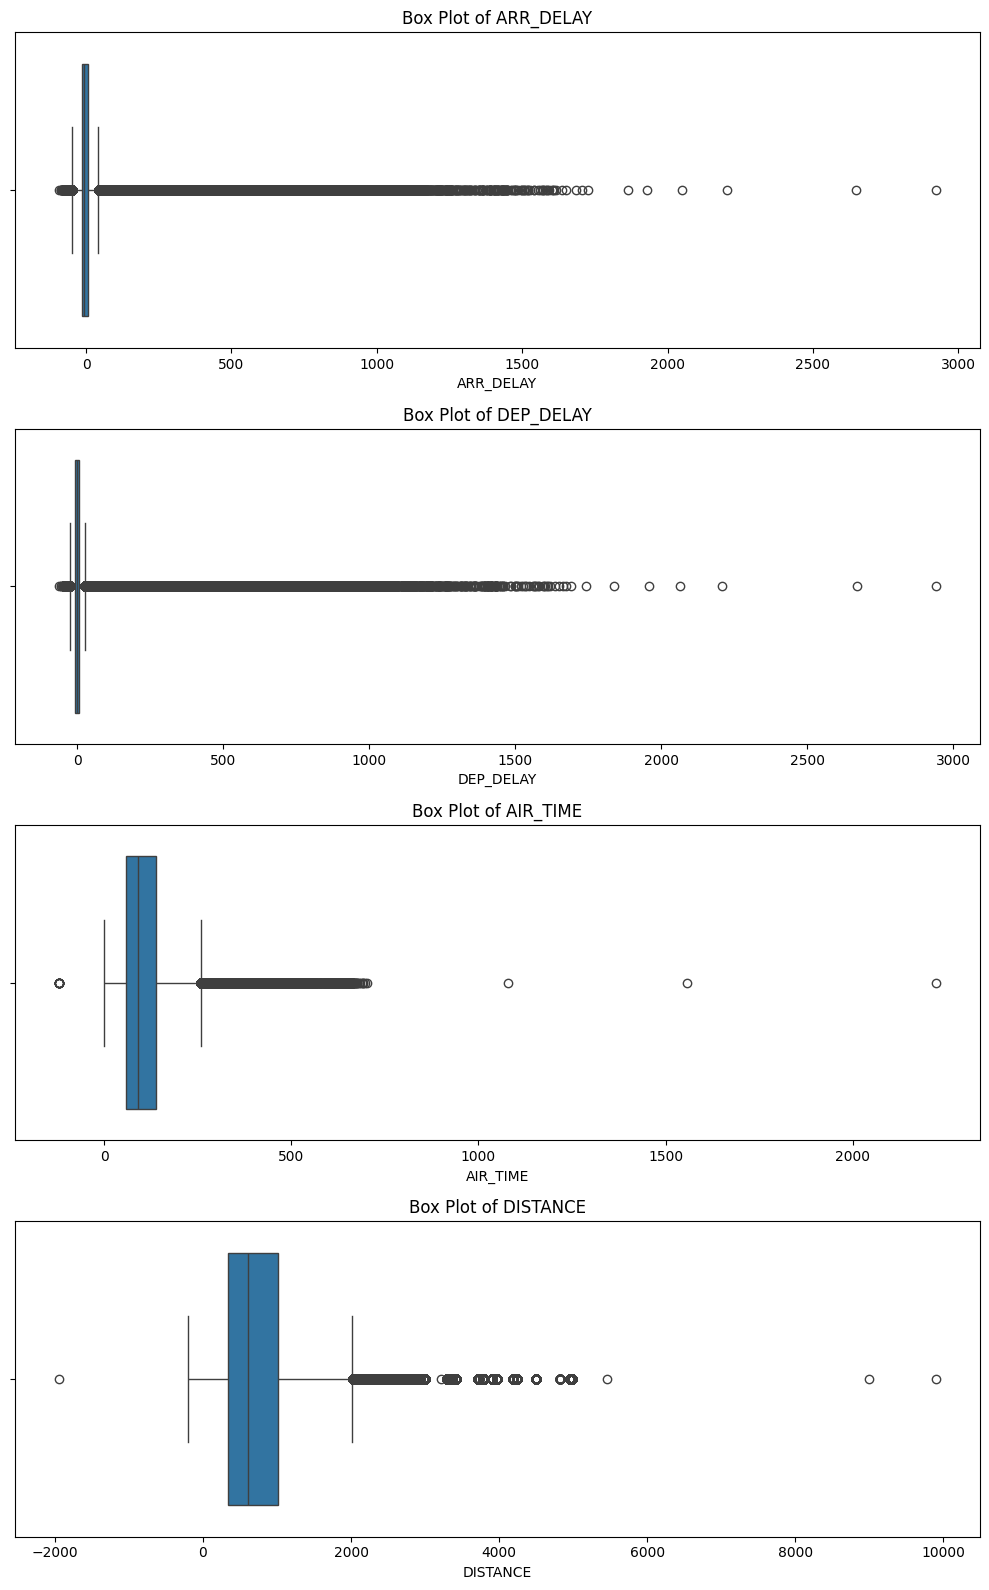

In [19]:
columns = ['ARR_DELAY','DEP_DELAY','AIR_TIME','DISTANCE']
plot_data_distributions(flights_df, columns) #plots the box plots for the above columns

#### Key Insights from the Box Plots:

**Arrival and Departure Delay:** The data shows that most flights tend to be on time with only minor delays. However, there is a significant number of flights that experience extreme delays, reaching beyond 2500 minutes. This indicates a high degree of right skewness in the distribution of flight delays.

**Air Time:** The distribution of flight times is approximately symmetrical, with the majority of flights lasting between 50 and 150 minutes. However, there are a few outliers with exceptionally long flight durations exceeding 2000 minutes.

**Distance:** The distribution is fairly symmetrical, centered around 600 miles. However, a significant number of outliers extend beyond 4000 miles, indicating the presence of some long-haul flights in the dataset.

**Outliers:**

All four variables exhibit outliers, with some extreme values observed in ARR_DELAY, DEP_DELAY, and AIR_TIME. This could be due to various factors such as weather disruptions, technical issues, or air traffic control problems.

The boxplot for DISTANCE and Airtime shows values below zero and near zero, which are clearly errors since distance cannot be negative or near zero. Further analysis is required to understand this issue. These errors need to be corrected before proceeding with further analysis.

In [20]:
flights_df[flights_df['AIR_TIME'] < 20].head()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,MONTH
17341,2019-03-13,OO,N608SK,3713,13487,MSP,"Minneapolis, MN",14633,RST,"Rochester, MN",-2.0,-14.0,19.0,76.0,0.61,3
17348,2019-03-13,OO,N822SK,3718,12884,LAN,"Lansing, MI",11433,DTW,"Detroit, MI",-2.0,-26.0,18.0,74.0,0.39,3
17355,2019-03-13,OO,N455CA,3724,11433,DTW,"Detroit, MI",12884,LAN,"Lansing, MI",0.0,-11.0,16.0,74.0,0.77,3
17358,2019-03-13,OO,N692CA,3726,11433,DTW,"Detroit, MI",12884,LAN,"Lansing, MI",-6.0,-20.0,19.0,74.0,0.94,3
18018,2019-03-13,OO,N976SW,5054,14006,PAH,"Paducah, KY",10967,CGI,"Cape Girardeau, MO",-12.0,-24.0,17.0,45.0,0.50,3


Considering the goal of our analysis, the near-zero values in airtime will not impact our analysis, so there is no need to handle this data. However, the distance values should be addressed as they affect our cost analysis. Removing the rows where the distance is less than 50 miles will provide us with a more accurate estimation.

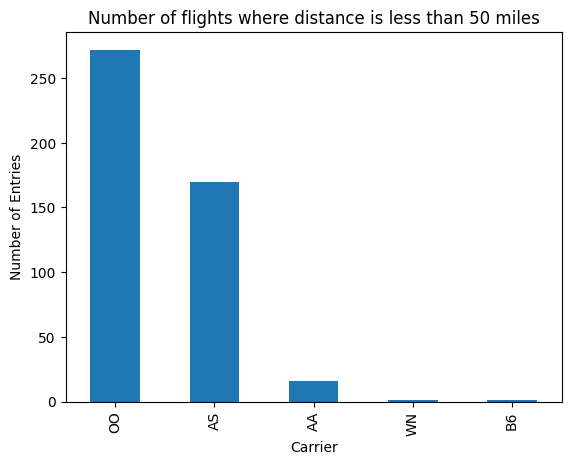

In [21]:
flights_df[flights_df['DISTANCE'] < 50]['OP_CARRIER'].value_counts().plot(kind='bar',
                                                                         xlabel = 'Carrier',
                                                                         ylabel = 'Number of Entries',
                                                                         title = 'Number of flights where distance is less than 50 miles')
plt.show()

Most of the flights within a 50-mile distance are operated by two carriers, **OO** and **AS**.

In [22]:
def clean_data(df):
    # Remove rows with negative AIR_TIME or DISTANCE
    df = df[(df['AIR_TIME'] >= 0) & (df['DISTANCE'] >= 50)] #setting the threshold of airtime 0 and the distance as 50
    return df

In [23]:
flights_df = clean_data(flights_df) #removes rows with non negative values in distance and airtime

Now I am going to remove the outliers using the previously defined function. Only the columns "DISTANCE", "ARR_DELAY", and "DEP_DELAY" will be considered since these columns impact the overall flight costs.

In [24]:
flights_df = remove_outliers_iqr(flights_df, 'DISTANCE')
flights_df = remove_outliers_iqr(flights_df, 'ARR_DELAY')
flights_df = remove_outliers_iqr(flights_df, 'DEP_DELAY')

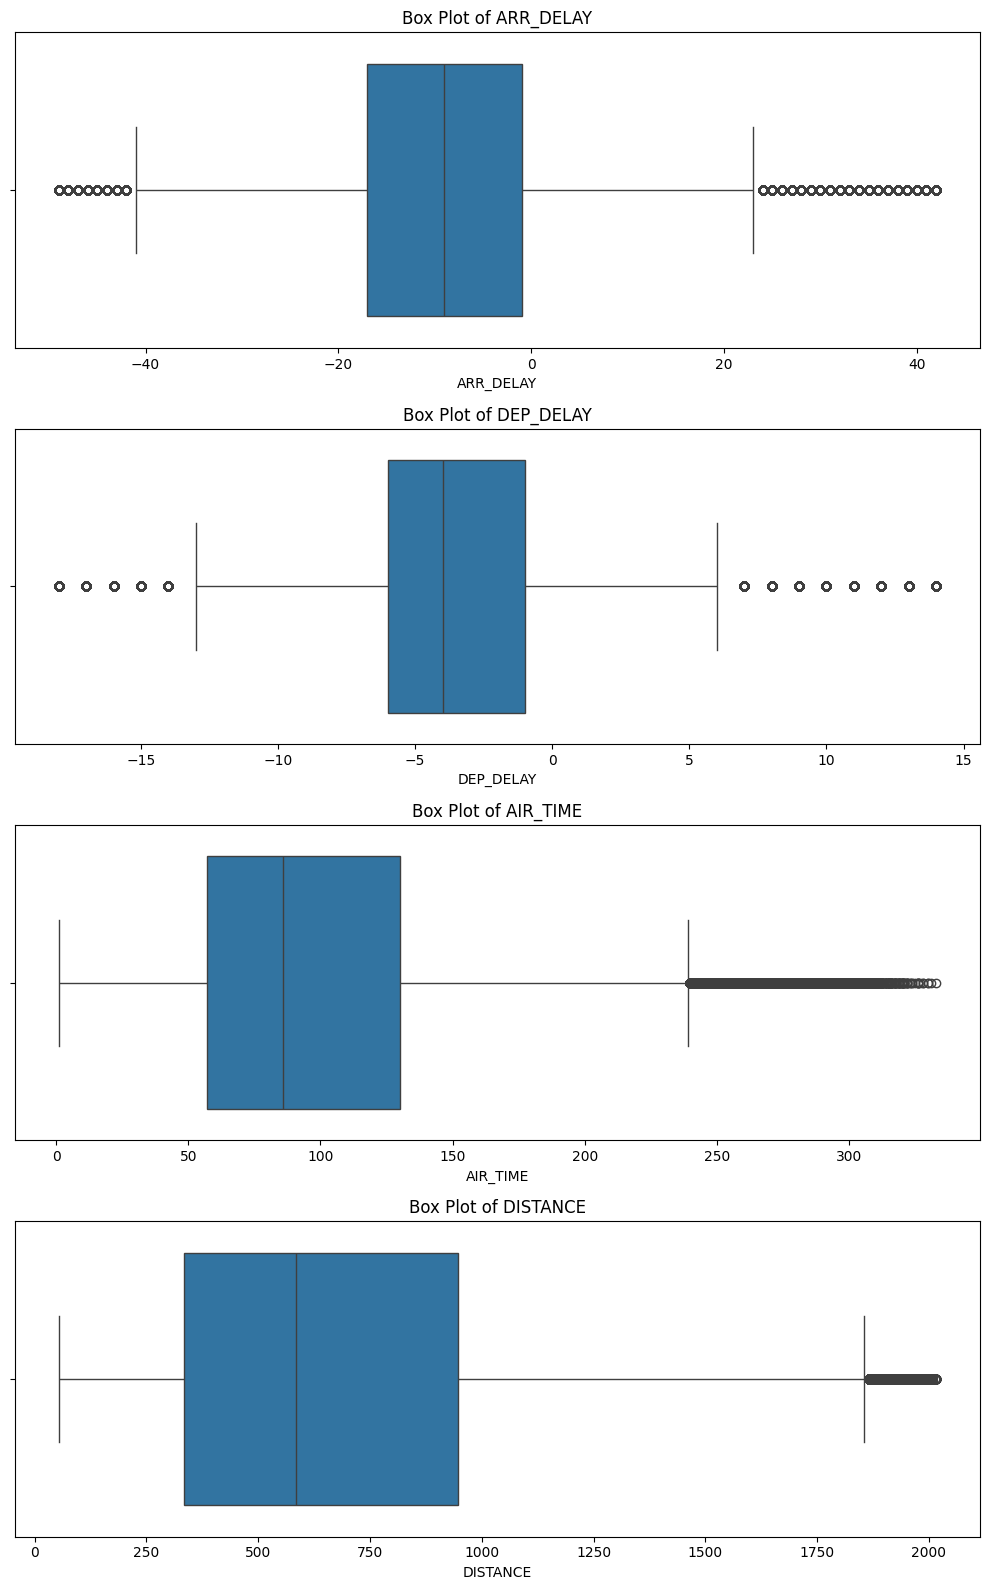

In [25]:
columns = ['ARR_DELAY','DEP_DELAY','AIR_TIME','DISTANCE']
plot_data_distributions(flights_df, columns)

Looking at the plots, we can see that the outliers have been removed, making the data ready for merging and analysis.

### New Column:

**MONTH:** The month number when the flight trip happend

### Data Quality Insights in the Flights data


- The FL_DATE column contains date fields that are entered inconsistently, with some in the format of mm/dd/yy and others in the m/d/y format. Additionally, the datatype of AIR_TIME and DISTANCE are interpreted as objects, which results in null values when converted into numeric values.

- Missing values have been removed based on further analysis, particularly when the fields do not significantly affect the overall data quality.

- The "Distance" and "Airtime" fields contain illogical negative values, as distance and time cannot be negative.

- There are numerous outliers in the distance column, which need to be addressed as they are a significant factor in overall costs.

- Most of the illogical airtime values are recorded by only two carriers, OO and AS.

- The flights dataset contains information beyond Q12019, so it has been filtered to include data from months 1, 2, and 3.

#### 2. Airport Codes Data

In [26]:
airportCodes_df

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
0,heliport,Total Rf Heliport,11.0,NaN,US,Bensalem,NaN,"-74.93360137939453, 40.07080078125"
1,small_airport,Aero B Ranch Airport,3435.0,NaN,US,Leoti,NaN,"-101.473911, 38.704022"
2,small_airport,Lowell Field,450.0,NaN,US,Anchor Point,NaN,"-151.695999146, 59.94919968"
3,small_airport,Epps Airpark,820.0,NaN,US,Harvest,NaN,"-86.77030181884766, 34.86479949951172"
4,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,Newport,NaN,"-91.254898, 35.6087"
...,...,...,...,...,...,...,...,...
55364,medium_airport,Yingkou Lanqi Airport,0.0,AS,CN,Yingkou,YKH,"122.3586, 40.542524"
55365,medium_airport,Shenyang Dongta Airport,NaN,AS,CN,Shenyang,NaN,"123.49600219726562, 41.784400939941406"
55366,heliport,Sealand Helipad,40.0,EU,GB,Sealand,NaN,"1.4825, 51.894444"
55367,small_airport,Glorioso Islands Airstrip,11.0,AF,TF,Grande Glorieuse,NaN,"47.296388888900005, -11.584277777799999"


In [27]:
airportCodes_df.drop_duplicates(inplace=True)

In [28]:
analyze_dataframe(airportCodes_df)

,Data Type,Missing Values,Unique Values
TYPE,object,0,7
NAME,object,0,52426
ELEVATION_FT,float64,6931,5478
CONTINENT,object,27838,6
ISO_COUNTRY,object,247,242
MUNICIPALITY,object,5704,27221
IATA_CODE,object,46093,9062
COORDINATES,object,0,55240


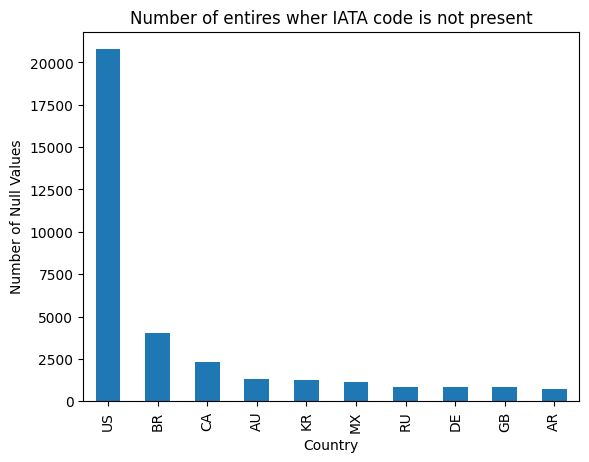

In [29]:
airportCodes_df[airportCodes_df['IATA_CODE'].isna()]['ISO_COUNTRY'].value_counts()[:10].plot(kind='bar',
                                                                         xlabel = 'Country',
                                                                         ylabel = 'Number of Null Values',
                                                                         title = 'Number of entires wher IATA code is not present')
plt.show()

The US has the most entries with null IATA codes. We will verify and check if we can omit invalid airports.

In [30]:
airportCodes_df[airportCodes_df['ISO_COUNTRY'] == 'US'] #Filtering data only for the United states
analyze_dataframe(airportCodes_df)

,Data Type,Missing Values,Unique Values
TYPE,object,0,7
NAME,object,0,52426
ELEVATION_FT,float64,6931,5478
CONTINENT,object,27838,6
ISO_COUNTRY,object,247,242
MUNICIPALITY,object,5704,27221
IATA_CODE,object,46093,9062
COORDINATES,object,0,55240


We can understand from this that the number of missing IATA codes is 46187, while the total number of different IATA codes in the US is 9062, which is a large number.

In [31]:
#looking for missing value in medium and large aiports in the US

analyze_dataframe(airportCodes_df[(airportCodes_df['ISO_COUNTRY'] == 'US') &
                                (airportCodes_df['TYPE'].isin(['medium_airport', 'large_airport']))])

,Data Type,Missing Values,Unique Values
TYPE,object,0,2
NAME,object,0,857
ELEVATION_FT,float64,3,651
CONTINENT,object,858,0
ISO_COUNTRY,object,0,1
MUNICIPALITY,object,3,716
IATA_CODE,object,37,821
COORDINATES,object,0,858


If we examine medium and large airports and identify any null values, we find that only 37 rows contain null values, which is relatively small and will not significantly impact our analysis.

From this, we can infer that the missing IATA codes in the dataset are likely for small or other types of airports. This is understandable considering the limited logistics at these types of airports.

The below "filter_airport_data" function packages everything we just did.

In [32]:
def filter_airport_data(airport_codes):

    """
    Filters airport data for US airports of medium or large size.

    Params:
        airport_codes (pandas.DataFrame): The DataFrame containing airport data, with columns 'ISO_COUNTRY', 'TYPE', and 'IATA_CODE'.

    Return:
        DataFrame: A new DataFrame containing only US airports of medium or large size, with columns 'IATA_CODE' and 'TYPE'.
    """
    # Filter for 'US' airports and medium/large types
    df_filtered = airport_codes[(airport_codes['ISO_COUNTRY'] == 'US') &
                                (airport_codes['TYPE'].isin(['medium_airport', 'large_airport']))]

    # Drop rows with NaN IATA codes
    df_filtered.dropna(subset=['IATA_CODE'], inplace=True)

    # Select only IATA_CODE and TYPE columns
    df_result = df_filtered[['IATA_CODE', 'TYPE']]

    df_result.reset_index(inplace=True,drop=True)

    return df_result

In [33]:
airport_type_code = filter_airport_data(airportCodes_df) #filtering based on US and Medium, Large airports
airport_type_code

,IATA_CODE,TYPE
0,WKK,medium_airport
1,ABE,medium_airport
2,ABI,medium_airport
3,ABQ,large_airport
4,ABR,medium_airport
...,...,...
816,OGG,medium_airport
817,BSF,medium_airport
818,ITO,medium_airport
819,UPP,medium_airport


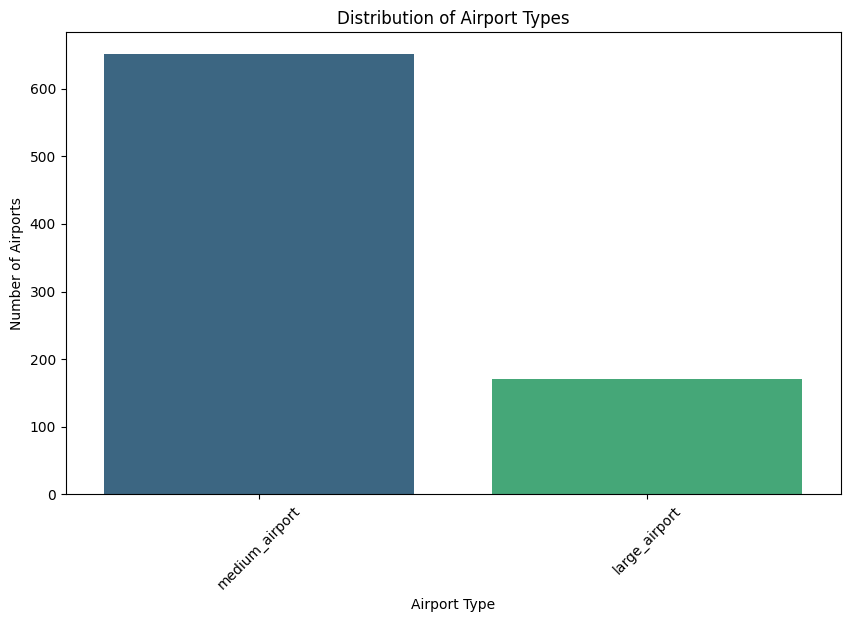

In [34]:
plot_airport_type_distribution(airport_type_code)

It is evident from the data that medium-sized airports are more prevalent in the US. There are approximately 650 medium-sized airports, significantly outnumbering the roughly 175 large airports in the dataset.

In [35]:
print('The number of non alphabetical values in the IATA code field is ',len(check_alphabetic_column(airport_type_code, 'IATA_CODE')))

The number of non alphabetical values in the IATA code field is  0


#### Structure of airport type code dataframe

In [36]:
print('Shape of Airport Codes Dataframe is ',airport_type_code.shape)
analyze_dataframe(airport_type_code)

Shape of Airport Codes Dataframe is  (821, 2)


,Data Type,Missing Values,Unique Values
IATA_CODE,object,0,821
TYPE,object,0,2


### Data Insights in the Airport Codes data

- The US country contains the most number airports with invalid IATA codes
- US country has the highest number of medium airports

#### 3. Tickets Data

In [37]:
#Selecting the data for which a Roundtrip has happened

tickets_df = tickets_df[tickets_df['ROUNDTRIP']==1]

In [38]:
analyze_dataframe(tickets_df)

,Data Type,Missing Values,Unique Values
ITIN_ID,int64,0,660878
YEAR,int64,0,1
QUARTER,int64,0,1
ORIGIN,object,0,409
ORIGIN_COUNTRY,object,0,1
ORIGIN_STATE_ABR,object,0,52
ORIGIN_STATE_NM,object,0,52
ROUNDTRIP,float64,0,1
REPORTING_CARRIER,object,0,21
PASSENGERS,float64,1197,223


We have confirmed that this dataset only includes data for the year 2019 and the first quarter. Additionally, the origin country is the US, with 52 states, and all trips are round trips, so we can remove these columns. The columns we are interested in are ORIGIN, DESTINATION, and ITIN_FARE.

The field ITIN_FARE is labeled as "object" and needs to be converted to numeric because it contains fare values.

In [39]:
#check for any irregular values in ITIN_FARE

check_non_numeric_column(tickets_df, 'ITIN_FARE')

['820$$$', '200 $', '$ 100.00', 'nan']

There are certain entries entered as above that need to be handled, so that when converting to numeric, the column will not generate errors and become null values.

In [40]:
tickets_df[tickets_df['ITIN_FARE'].isin(['820$$$', '200 $', '$ 100.00', 'nan'])]

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
1730,201913102587,2019,1,ABY,US,GA,Georgia,1.0,OO,1.0,820$$$,DCA
3473,201913103359,2019,1,ACV,US,CA,California,1.0,OO,1.0,820$$$,DEN
6573,201913118270,2019,1,BGM,US,NY,New York,1.0,OO,1.0,200 $,SAV
10233,201912575050,2019,1,CKB,US,WV,West Virginia,1.0,G4,3.0,$ 100.00,SFB
11541,201913161681,2019,1,CYS,US,WY,Wyoming,1.0,OO,1.0,200 $,DFW
...,...,...,...,...,...,...,...,...,...,...,...,...
1165630,201912636522,2019,1,USA,US,NC,North Carolina,1.0,G4,10.0,$ 100.00,PGD
1165950,201912636643,2019,1,USA,US,NC,North Carolina,1.0,G4,22.0,$ 100.00,PIE
1166107,201912636280,2019,1,USA,US,NC,North Carolina,1.0,G4,2.0,200 $,FLL
1166242,201912636796,2019,1,USA,US,NC,North Carolina,1.0,G4,1.0,$ 100.00,SFB


To understand the impact of directly converting the object into numeric on null values, I will create a copy of the dataframe and then attempt the conversion.

In [41]:
t_df = tickets_df #copying the dataframe

t_df['ITIN_FARE'] = pd.to_numeric(t_df['ITIN_FARE'], errors='coerce') #converting the column datatype without handling those cases

analyze_dataframe(t_df)

,Data Type,Missing Values,Unique Values
ITIN_ID,int64,0,660878
YEAR,int64,0,1
QUARTER,int64,0,1
ORIGIN,object,0,409
ORIGIN_COUNTRY,object,0,1
ORIGIN_STATE_ABR,object,0,52
ORIGIN_STATE_NM,object,0,52
ROUNDTRIP,float64,0,1
REPORTING_CARRIER,object,0,21
PASSENGERS,float64,1197,223


As you can see, the number of null values in ITIN Fare has increased from 560 to 1850. This is a significant change as the null values have quadrupled. We need to address this issue first.

In [42]:
# Remove dollar signs, spaces, and commas
tickets_df['ITIN_FARE'] = tickets_df['ITIN_FARE'].astype(str).str.replace(r'[$, ]', '', regex=True)

# Remove multiple decimal points and keep only the first one
tickets_df['ITIN_FARE'] = tickets_df['ITIN_FARE'].astype(str).str.replace(r'\.(?=.*\.)', '', regex=True)

In [43]:
#check for any irregular values in ITIN_FARE

check_non_numeric_column(tickets_df, 'ITIN_FARE')

['nan']

In [44]:
#converting to numeric, handling errors to Nan Values

tickets_df['ITIN_FARE'] = pd.to_numeric(tickets_df['ITIN_FARE'], errors='coerce')

In [45]:
analyze_dataframe(tickets_df)

,Data Type,Missing Values,Unique Values
ITIN_ID,int64,0,660878
YEAR,int64,0,1
QUARTER,int64,0,1
ORIGIN,object,0,409
ORIGIN_COUNTRY,object,0,1
ORIGIN_STATE_ABR,object,0,52
ORIGIN_STATE_NM,object,0,52
ROUNDTRIP,float64,0,1
REPORTING_CARRIER,object,0,21
PASSENGERS,float64,1197,223


Now the null values have not been changed. This demonstrates the success of our function

I am interested in the average ticket fare from an origin to a destination. So, I will create a separate table called average_fares, which contains Origin, destination, and the Average Itinerary Fare for them.

In [46]:
average_fares = tickets_df.pivot_table(values='ITIN_FARE', index=['ORIGIN', 'DESTINATION'], aggfunc='mean')

In [47]:
average_fares.reset_index(inplace=True)

In [48]:
analyze_dataframe(average_fares)

,Data Type,Missing Values,Unique Values
ORIGIN,object,0,409
DESTINATION,object,0,392
ITIN_FARE,float64,0,16836


The null values in the ITIN FARE are handled by taking the average fare between the ORIGIN and DESTINATION.

In [49]:
average_fares.head()

,ORIGIN,DESTINATION,ITIN_FARE
0,ABE,ABQ,534.000000
1,ABE,AGS,299.000000
2,ABE,AMA,654.000000
3,ABE,ASE,742.000000
4,ABE,ATL,505.038462


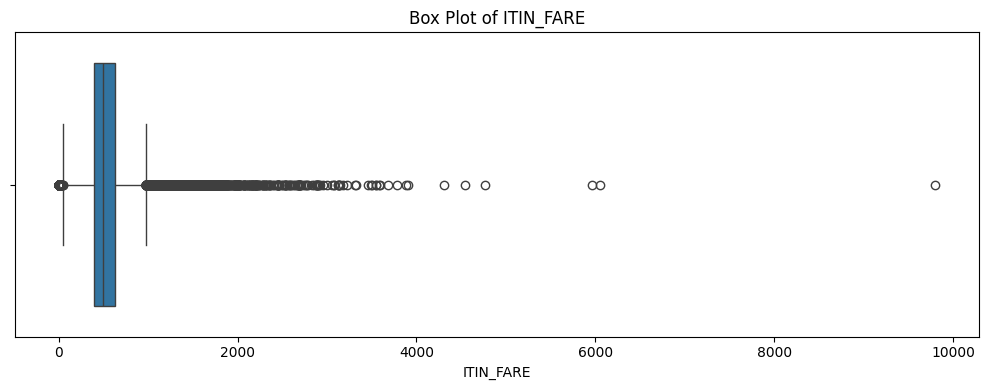

In [50]:
plot_data_distributions(average_fares, ['ITIN_FARE'])

The box plot indicates that most fares in the dataset are quite affordable, with a median below $1000. However, there is a wide range of prices, and several outliers represent significantly more expensive itineraries. The presence of outliers in the data could impact the analysis, so it's important to address these outliers.

In [51]:
average_fares = remove_outliers_iqr(average_fares, 'ITIN_FARE')

In [52]:
average_fares.describe()

,ITIN_FARE
count,37344.000000
mean,506.280734
std,164.685822
min,45.000000
25%,394.267045
50%,487.500000
75%,601.522883
max,977.000000


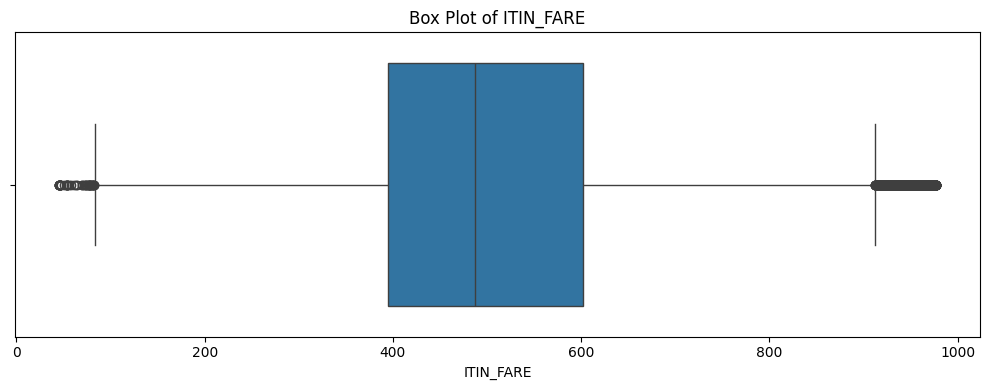

In [53]:
plot_data_distributions(average_fares, ['ITIN_FARE'])

Now the outliers are removed and most of the fares in the united states range from 400 - 600 which is affordable.

#### Structure of Average Fares Dataframe

In [54]:
print('Shape of Average Fare Dataframe is ',average_fares.shape)
analyze_dataframe(average_fares)

Shape of Average Fare Dataframe is  (37344, 3)


,Data Type,Missing Values,Unique Values
ORIGIN,object,0,405
DESTINATION,object,0,388
ITIN_FARE,float64,0,15560


### Data Insights in the Airport Codes data

- The ITIN fare consists of values that are mixed with dollar sign (eg: 800$$$)
- There are outliers in the ITIN fare where some fares exceed 5000 usd which is super expensive
- There are 405 Origin stations and 388 Destination station in US where most number of flights happen

### Step 5: Data Munging

In [55]:
def Data_merge(flights_df, airports_df, fares_df):
    """
    Merges flight data with airport codes and average fares information.

    Args:
    flights_df (pd.DataFrame): DataFrame containing flight data with 'ORIGIN' and 'DESTINATION' columns.
    airports_df (pd.DataFrame): DataFrame containing airport data with 'IATA_CODE' and additional columns.
    fares_df (pd.DataFrame): DataFrame containing average fare data with 'ORIGIN' and 'DESTINATION' columns.

    Returns:
    pd.DataFrame: The merged DataFrame containing flight data enriched with airport codes and average fares.
    """

    # Merge flights data with airport codes on origin airport
    flights_airports = pd.merge(
        flights_df,
        airports_df,
        left_on='ORIGIN',
        right_on='IATA_CODE',
        how='left',
        suffixes=('', '_origin') # Add suffix to distinguish columns from different DataFrames
    )

    # Merge flights data with airport codes on destination airport
    flights_airports = pd.merge(
        flights_airports,
        airports_df,
        left_on='DESTINATION',
        right_on='IATA_CODE',
        how='left',
        suffixes=('', '_dest') # Add suffix to distinguish columns from different DataFrames
    )

    # Merge with average fares data
    final_df = pd.merge(
        flights_airports,
        fares_df,
        left_on=['ORIGIN', 'DESTINATION'],      # Use both origin and destination as merge keys
        right_on=['ORIGIN', 'DESTINATION'],
        how='left'
    )

    return final_df # return dataframe

In [56]:
merged_data = Data_merge(flights_df, airport_type_code, average_fares)

In [57]:
merged_data.head()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,...,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,MONTH,IATA_CODE,TYPE,IATA_CODE_dest,TYPE_dest,ITIN_FARE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",...,-6.0,143.0,1025.0,0.97,3,RSW,large_airport,CLE,large_airport,239.289855
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",...,5.0,135.0,930.0,0.55,3,RSW,large_airport,CMH,large_airport,262.830189
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",...,4.0,132.0,930.0,0.91,3,RSW,large_airport,CMH,large_airport,262.830189
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",...,14.0,136.0,930.0,0.67,3,RSW,large_airport,CMH,large_airport,262.830189
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",...,-17.0,151.0,1005.0,0.62,3,RSW,large_airport,DAL,large_airport,405.545455


In [58]:
merged_data.rename(columns = {'IATA_CODE':'IATA_CODE_origin',
                              'TYPE':'TYPE_origin',
                              'ITIN_FARE':'AVERAGE_FARE'}, inplace=True)

In [59]:
merged_data

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,...,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,MONTH,IATA_CODE_origin,TYPE_origin,IATA_CODE_dest,TYPE_dest,AVERAGE_FARE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",...,-6.0,143.0,1025.0,0.970000,3,RSW,large_airport,CLE,large_airport,239.289855
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",...,5.0,135.0,930.0,0.550000,3,RSW,large_airport,CMH,large_airport,262.830189
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",...,4.0,132.0,930.0,0.910000,3,RSW,large_airport,CMH,large_airport,262.830189
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",...,14.0,136.0,930.0,0.670000,3,RSW,large_airport,CMH,large_airport,262.830189
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",...,-17.0,151.0,1005.0,0.620000,3,RSW,large_airport,DAL,large_airport,405.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414425,2019-01-23,B6,N8730Q,7455,14635,RSW,"Fort Myers, FL",14576,ROC,"Rochester, NY",...,11.0,123.0,900.0,0.555812,1,RSW,large_airport,ROC,large_airport,467.857143
1414426,2019-01-09,NK,N441WN,45645,14635,RSW,"Fort Myers, FL",14679,SAN,"San Diego, CA",...,7.0,2.0,234.0,0.993263,1,RSW,large_airport,SAN,large_airport,721.875000
1414427,2019-03-02,NK,N779SW,3345,14635,RSW,"Fort Myers, FL",15016,STL,"St. Louis, MO",...,14.0,3.0,979.0,0.749244,3,RSW,large_airport,STL,large_airport,375.290909
1414428,2019-01-08,UA,N8525S,YUD,14679,SAN,"San Diego, CA",10423,AUS,"Austin, TX",...,-17.0,5.0,1164.0,0.394183,1,SAN,large_airport,AUS,large_airport,392.106383


In [60]:
analyze_dataframe(merged_data)

,Data Type,Missing Values,Unique Values
FL_DATE,datetime64[ns],0,90
OP_CARRIER,object,0,26
TAIL_NUM,object,0,5899
OP_CARRIER_FL_NUM,object,0,6869
ORIGIN_AIRPORT_ID,int64,0,360
ORIGIN,object,0,360
ORIGIN_CITY_NAME,object,0,354
DEST_AIRPORT_ID,int64,0,360
DESTINATION,object,0,360
DEST_CITY_NAME,object,0,354


Given the size of the dataset which is huge (~1414430 rows), It is perfectly fine to remove the null values that does not serve a purpose.

In [61]:
merged_data.dropna(inplace=True)

In order to complete the analysis, we need additional fields that provide information about the costs per flight. To obtain this, we can make a few assumptions.

The assumptions for COSTS are:

- Fuel, Oil, Maintenance, Crew - 8 USD per mile total
- Depreciation, Insurance, Other - 1.18 USD per mile total
- Airport operational costs for the right to use the airports and related services are fixed at 5,000 USD for medium airports and 10,000 USD for large airports. There is one charge for each airport where a flight lands. Thus, a round trip flight has a total of two airport charges.
- For each individual departure, the first 15 minutes of delays are free, otherwise each minute costs the airline 75 in added operational costs.
- For each individual arrival, the first 15 minutes of delays are free, otherwise each minute costs the airline 75 USD in added operational costs.


The assumptions for REVENUE are:

- Each plane can accommodate up to 200 passengers and each flight has an associated occupancy rate provided in the Flights data set. Do not use the Tickets data set to determine occupancy.
- Baggage fee is 35 USD for each checked bag per flight. We expect 50% of passengers to check an average of 1 bag per flight. The fee is charged separately for each leg of a round trip flight, thus 50% of passengers will be charged a total of 70 USD in baggage fees for a round trip flight.
- Disregard seasonal effects on ticket prices (i.e. ticket prices are the same in April as they are on Memorial Day or in December)

In [62]:
def calculate_flight_costs(df):
    """
    Calculates various cost components and the total cost for each flight in a DataFrame.

    This function performs the following calculations for each flight:

    1. Total fuel, maintenance, and crew costs based on distance and cost per mile.
    2. Total depreciation and insurance costs based on distance and cost per mile.
    3. Total airport costs based on origin and destination airport types.
    4. Total delay costs, considering a grace period for free delay minutes.
    5. Total cost by summing up the individual cost components.

    Args:
        df: dataframe containing flight data with columns
        'DISTANCE', 'TYPE_origin', 'TYPE_dest', 'DEP_DELAY', 'ARR_DELAY'.

    Returns:
        pd.DataFrame: The input DataFrame with new columns added for each cost component and total cost.
    """

    cost_per_mile = 8  # Fuel, oil, maintenance, and crew cost per mile
    depreciation_per_mile = 1.18  # Depreciation, insurance, and other costs per mile
    medium_airport_cost = 5000 #medium airport cost per flight
    large_airport_cost = 10000 #large airport cost per flight
    delay_cost_per_minute = 75 #delay/min cost if exceed 15 minutes
    free_delay_minutes = 15

    # Cost calculations
    df['TOTAL_FUEL_MAINTENANCE_CREW'] = df['DISTANCE'] * cost_per_mile
    df['TOTAL_DEPRECIATION_INSURANCE'] = df['DISTANCE'] * depreciation_per_mile

    # Airport costs based on type
    df['TOTAL_AIRPORT_COSTS'] = df.apply(
        lambda x: (medium_airport_cost if x['TYPE_origin'] == 'medium_airport' else large_airport_cost) +
                  (medium_airport_cost if x['TYPE_dest'] == 'medium_airport' else large_airport_cost),
        axis=1
    )

    # Delay costs
    def calculate_delay_costs(row):
        dep_delay_cost = max(0, row['DEP_DELAY'] - free_delay_minutes) * delay_cost_per_minute
        arr_delay_cost = max(0, row['ARR_DELAY'] - free_delay_minutes) * delay_cost_per_minute
        return dep_delay_cost + arr_delay_cost

    df['TOTAL_DELAY_COSTS'] = df.apply(calculate_delay_costs, axis=1)

    # Total cost
    df['TOTAL_COST'] = (df['TOTAL_FUEL_MAINTENANCE_CREW'] + df['TOTAL_DEPRECIATION_INSURANCE'] +
                        df['TOTAL_AIRPORT_COSTS'] + df['TOTAL_DELAY_COSTS'])

    return df

In [63]:
def calculate_passenger_and_baggage_revenue(df):

    """
    Calculates estimated passenger revenue, baggage fee revenue, and total revenue for each flight.

    This function performs the following calculations:

    1. Estimates the number of passengers on each flight based on occupancy rate and maximum capacity.
    2. Calculates average fare revenue by multiplying estimated passengers by the average fare.
    3. Calculates baggage fee revenue based on the number of passengers, bag fee per passenger, and the percentage of passengers checking bags, we also consider the round trip.
    4. Calculates total revenue by summing average fare revenue and baggage fee revenue.

    Params:
        df: a dataframe containing fields "OCCUPANCY_RATE", "ESTIMATED_PASSENGERS"

    """

    max_passengers = 200  # maximum capacity of the plane
    bag_fee_per_passenger = 35  # baggage fee per checked bag
    percentage_of_passengers_with_bags = 0.5  # 50% of passengers check bags

    # Calculate estimated number of passengers
    df['ESTIMATED_PASSENGERS'] = (df['OCCUPANCY_RATE'] * max_passengers).round()

    df['AVERAGE_FARE_REVENUE'] = (df['ESTIMATED_PASSENGERS'] * df['AVERAGE_FARE']).round()
    # Calculate baggage fee revenue
    df['BAGGAGE_FEE_REVENUE'] = df['ESTIMATED_PASSENGERS'] * percentage_of_passengers_with_bags * bag_fee_per_passenger * 2
    df['TOTAL_REVENUE'] = df['AVERAGE_FARE_REVENUE'] + df['BAGGAGE_FEE_REVENUE']
    return df

In [64]:
merged_data = calculate_flight_costs(merged_data) #calculating costs

In [65]:
merged_data = calculate_passenger_and_baggage_revenue(merged_data) #calculating revenue fields

As our analysis involves Round trip i.e, JFK -> IAD is same as IAD -> JFK. We need a field 'ROUND TRIP' that helps in facilitating this analysis

In [66]:
#creating a new field Round trip which contains values in the form (JFK, IAD)

merged_data['ROUND_TRIP'] = merged_data.apply(lambda x: '-'.join(sorted([x['ORIGIN'], x['DESTINATION']])), axis=1)

In [67]:
print('The shape of the Final Dataset after calculations--------------------> ', merged_data.shape)
print(merged_data.columns)

The shape of the Final Dataset after calculations-------------------->  (1373719, 31)
Index(['FL_DATE', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID',
       'DESTINATION', 'DEST_CITY_NAME', 'DEP_DELAY', 'ARR_DELAY', 'AIR_TIME',
       'DISTANCE', 'OCCUPANCY_RATE', 'MONTH', 'IATA_CODE_origin',
       'TYPE_origin', 'IATA_CODE_dest', 'TYPE_dest', 'AVERAGE_FARE',
       'TOTAL_FUEL_MAINTENANCE_CREW', 'TOTAL_DEPRECIATION_INSURANCE',
       'TOTAL_AIRPORT_COSTS', 'TOTAL_DELAY_COSTS', 'TOTAL_COST',
       'ESTIMATED_PASSENGERS', 'AVERAGE_FARE_REVENUE', 'BAGGAGE_FEE_REVENUE',
       'TOTAL_REVENUE', 'ROUND_TRIP'],
      dtype='object')


### Step 6: Data Analysis & Visualization

#### 1. The 10 busiest round trip routes in terms of number of round trip flights in the quarter.

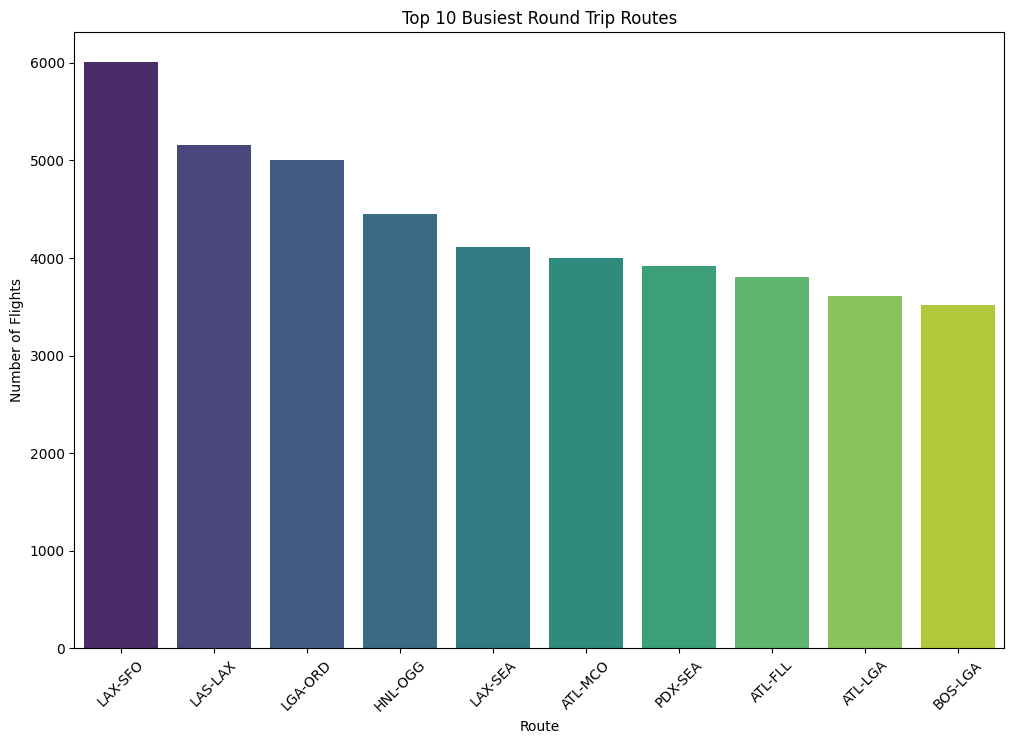

In [68]:
busy_routes = merged_data.groupby('ROUND_TRIP').size().reset_index(name='Flights')
top_10_busy_routes = busy_routes.nlargest(10, 'Flights')

plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_busy_routes, x='ROUND_TRIP', y='Flights', palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Busiest Round Trip Routes')
plt.xlabel('Route')
plt.ylabel('Number of Flights')
plt.show()

Analysis: The top three routes, LAX-SFO, LAS-LAX, and LGA-ORD, are all on the West Coast, showing a higher concentration of travel demand in this region.

These routes have the highest number of flights, indicating high demand and popularity. They could be crucial revenue streams for airlines and may benefit from increased capacity or frequency.

#### 2. The 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter. Along with the profit, show total revenue, total cost, summary values of other key components and total round trip flights in the quarter for the top 10 most profitable routes.

In [69]:
merged_data.head()
merged_data['PROFIT'] = merged_data['TOTAL_REVENUE'] - merged_data['TOTAL_COST'] #profit is calculated by revenue subtracted with costs
profitable_routes = merged_data.groupby('ROUND_TRIP').agg(
    Total_Revenue = ('TOTAL_REVENUE','sum'), #total revenue for that route
    Total_Cost = ('TOTAL_COST','sum'), #total cost in that route
    Profit = ('PROFIT','sum'), #total profit in that route
    Average_Passengers = ('ESTIMATED_PASSENGERS', 'mean'), #average passengers per flight in that route
    Flights = ('FL_DATE','count') #number of flights in that route
)
profitable_routes

,Total_Revenue,Total_Cost,Profit,Average_Passengers,Flights
ROUND_TRIP,,,,,
ABE-ATL,29435969.0,7916122.20,21519846.80,130.735135,370
ABE-CLT,29172358.0,8558605.20,20613752.80,131.431818,440
ABE-DTW,21519460.0,7551073.50,13968386.50,128.912281,399
ABE-FLL,1029130.0,885979.68,143150.32,119.111111,36
ABE-ORD,15971421.0,4400802.48,11570618.52,130.822967,209
...,...,...,...,...,...
STL-TPA,17431375.0,8985701.82,8445673.18,130.130841,321
STL-TUL,15017893.0,6366252.32,8651640.68,129.211679,274
SYR-TPA,1645756.0,1359212.40,286543.60,119.822222,45


In [70]:
profitable_routes = profitable_routes.reset_index()
profitable_routes['Profit'] = profitable_routes['Profit']/1_000_000 # Profitbale route in millions
top_10_profitable = profitable_routes.nlargest(10,'Profit')

top_10_profitable

,ROUND_TRIP,Total_Revenue,Total_Cost,Profit,Average_Passengers,Flights
1052,DCA-ORD,216061554.0,7.670150e+07,139.360056,130.095652,2990
174,ATL-LGA,232815318.0,9.762750e+07,135.187820,130.495154,3611
121,ATL-CLT,182849111.0,5.934832e+07,123.500796,129.507818,2686
2018,LGA-ORD,257263850.0,1.340935e+08,123.170384,129.550759,5004
1979,LAX-SFO,258526052.0,1.392122e+08,119.313849,130.112756,6013
171,ATL-LAX,205447205.0,8.726241e+07,118.184797,129.845217,2300
130,ATL-DCA,189520846.0,7.480018e+07,114.720666,130.032150,2986
1036,DCA-LGA,168059350.0,5.597003e+07,112.089319,131.103937,2540
784,CLT-GSP,134813414.0,2.750679e+07,107.306623,129.835967,1329
1649,HNL-OGG,176258446.0,7.089941e+07,105.359035,129.495508,4452


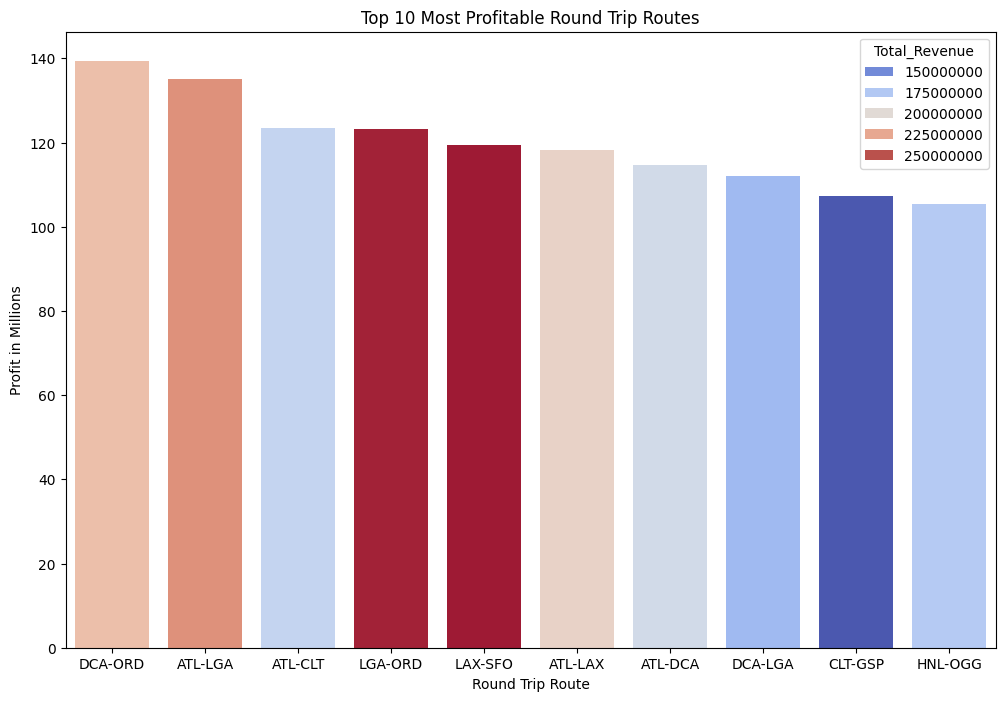

In [71]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_profitable, x='ROUND_TRIP', y='Profit', hue='Total_Revenue', palette='coolwarm')
plt.title('Top 10 Most Profitable Round Trip Routes')
plt.xlabel('Round Trip Route')
plt.ylabel('Profit in Millions')
plt.show()

Out of 10 round trip routes, 4 routes include Atlanta due to its major hub status. Additionally, the DCA airport yields better profits compared to other routes.

#### 3. The 5 round trip routes that you recommend to invest in based on any factors that you choose.

To get a picture on which factors affect the profit more, we are going to see the correlation heatmap for the numerical columns.

In [72]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1373719 entries, 0 to 1414429
Data columns (total 32 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   FL_DATE                       1373719 non-null  datetime64[ns]
 1   OP_CARRIER                    1373719 non-null  object        
 2   TAIL_NUM                      1373719 non-null  object        
 3   OP_CARRIER_FL_NUM             1373719 non-null  object        
 4   ORIGIN_AIRPORT_ID             1373719 non-null  int64         
 5   ORIGIN                        1373719 non-null  object        
 6   ORIGIN_CITY_NAME              1373719 non-null  object        
 7   DEST_AIRPORT_ID               1373719 non-null  int64         
 8   DESTINATION                   1373719 non-null  object        
 9   DEST_CITY_NAME                1373719 non-null  object        
 10  DEP_DELAY                     1373719 non-null  float64       
 11  ARR

In [73]:
correlation_df = merged_data.select_dtypes(include=[np.number]).corr() #find the correlation among the columns

In [74]:
correlation_df.iloc[ :, 2:]

,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,MONTH,AVERAGE_FARE,TOTAL_FUEL_MAINTENANCE_CREW,TOTAL_DEPRECIATION_INSURANCE,TOTAL_AIRPORT_COSTS,TOTAL_DELAY_COSTS,TOTAL_COST,ESTIMATED_PASSENGERS,AVERAGE_FARE_REVENUE,BAGGAGE_FEE_REVENUE,TOTAL_REVENUE,PROFIT
ORIGIN_AIRPORT_ID,-0.026720,-0.000340,0.030297,0.054427,-0.000005,0.000931,-0.122325,0.054427,0.054427,0.030857,0.004613,0.057624,-0.000005,-0.077352,-0.000005,-0.073841,-0.085989
DEST_AIRPORT_ID,0.010314,0.027135,0.074772,0.054872,-0.001435,-0.000011,-0.082392,0.054872,0.054872,0.032556,0.008983,0.058857,-0.001435,-0.053042,-0.001435,-0.050720,-0.062935
DEP_DELAY,1.000000,0.407483,0.088118,0.104291,-0.000412,0.023740,0.001304,0.104291,0.104291,0.092709,0.129495,0.128854,-0.000412,0.000253,-0.000412,0.000217,-0.025656
ARR_DELAY,0.407483,1.000000,0.041612,-0.032487,-0.000298,0.008555,-0.018275,-0.032487,-0.032487,-0.016217,0.497041,-0.014873,-0.000298,-0.011714,-0.000298,-0.011200,-0.008301
AIR_TIME,0.088118,0.041612,1.000000,0.969874,0.001152,0.001818,0.257239,0.969874,0.969874,0.221922,0.062422,0.889935,0.001151,0.163567,0.001151,0.156210,-0.021271
DISTANCE,0.104291,-0.032487,0.969874,1.000000,0.001370,0.003479,0.255536,1.000000,1.000000,0.223008,0.025299,0.913712,0.001370,0.162653,0.001370,0.155351,-0.026911
OCCUPANCY_RATE,-0.000412,-0.000298,0.001152,0.001370,1.000000,0.001566,0.000463,0.001370,0.001370,0.001110,-0.000973,0.001548,1.000000,0.748911,1.000000,0.774487,0.780227
MONTH,0.023740,0.008555,0.001818,0.003479,0.001566,1.000000,0.001671,0.003479,0.003479,-0.005581,-0.020953,-0.000244,0.001566,0.002205,0.001566,0.002198,0.002265
AVERAGE_FARE,0.001304,-0.018275,0.257239,0.255536,0.000463,0.001671,1.000000,0.255536,0.255536,0.040964,0.019861,0.227332,0.000463,0.633221,0.000463,0.604504,0.563577
TOTAL_FUEL_MAINTENANCE_CREW,0.104291,-0.032487,0.969874,1.000000,0.001370,0.003479,0.255536,1.000000,1.000000,0.223008,0.025299,0.913712,0.001370,0.162653,0.001370,0.155351,-0.026911


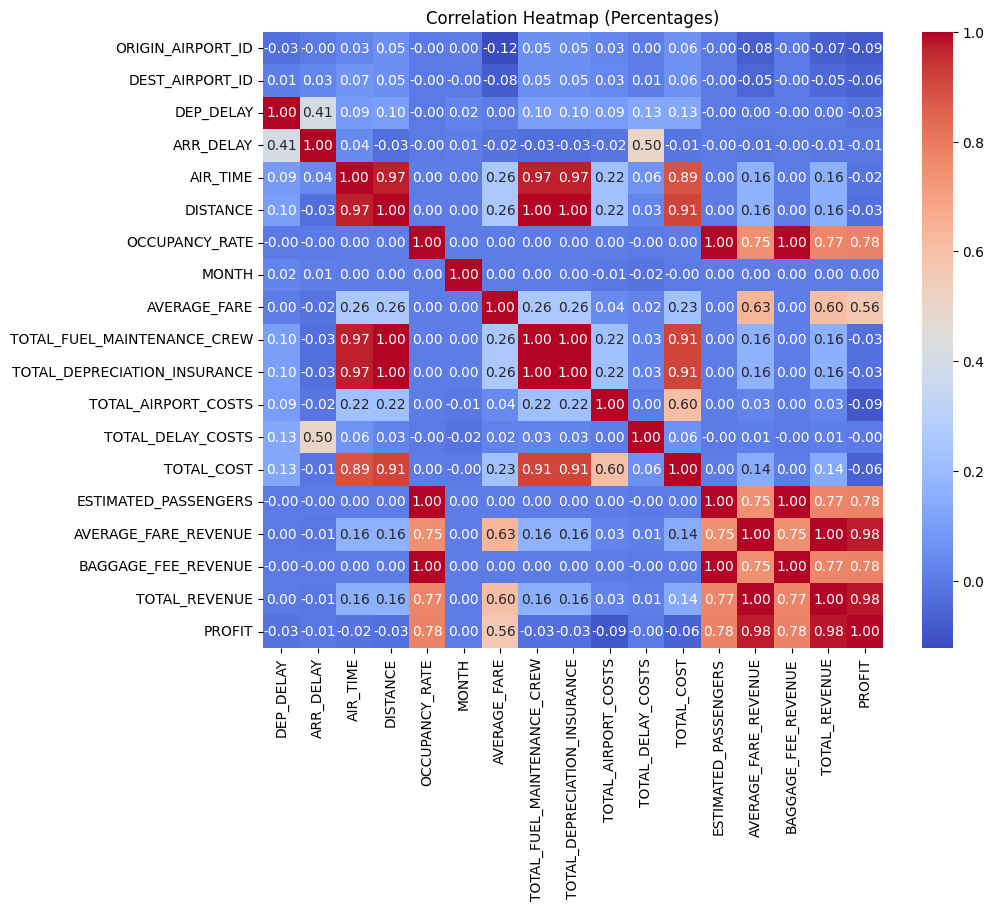

In [75]:
# Create a new figure for the plot
plt.figure(figsize=(10, 8))

# Create heatmap with annotations (percentages)
sns.heatmap(correlation_df.iloc[ :, 2:], annot=True, fmt=".2f", cmap="coolwarm")  # Adjust cmap for color preference

plt.xticks(rotation=90)
plt.yticks(rotation=0)  # Optional: Keep y-axis labels horizontal

# Set title
plt.title('Correlation Heatmap (Percentages)')

# Show plot
plt.show()

In order for a flight to be successful, profitability is a key factor. In fact, profitability is crucial for any business. Therefore, it's important to select routes that offer the highest profits.

Analyzing the heatmap above, it's clear that the occupancy rate significantly impacts profits.

In order to sustain demand, we must remember that passengers are crucial. Maintaining low number of passengers will have a long-term impact on operations, despite the high profit margin in the beginning.

The airline's motto is 'On time, for you.' In order to maintain the brand image, the company must make efforts to reduce delays. Therefore, the delay factor will significantly impact operations.

Here are the factors that I believe will be helpful in sustainment and also maintaining quality service.

-  Average Profit per route ===> 50% of the weight in the operations
-  Occupancy =====> 30 % of the weight in operations
-  Average_Overall_Delay ====> 20% of the weight in operations

In [111]:
# creates a new dataframe with the values that we discussed above

x = merged_data.groupby('ROUND_TRIP').agg(
    Average_Profit = ('PROFIT','mean'),
    Occupancy = ('OCCUPANCY_RATE','mean'),
    Dep_Delay = ('DEP_DELAY','mean'),
    Arr_Delay = ('ARR_DELAY','mean')
)

In [112]:
x

,Average_Profit,Occupancy,Dep_Delay,Arr_Delay
ROUND_TRIP,,,,
ABE-ATL,58161.748108,0.653676,-2.364865,-8.127027
ABE-CLT,46849.438182,0.657159,-3.552273,-5.881818
ABE-DTW,35008.487469,0.644561,-3.318296,-11.827068
ABE-FLL,3976.397778,0.595556,-2.000000,-3.527778
ABE-ORD,55361.811100,0.654115,-5.741627,-11.894737
...,...,...,...,...
STL-TPA,26310.508349,0.650654,-0.174455,-6.034268
STL-TUL,31575.330949,0.646058,-0.722628,-6.656934
SYR-TPA,6367.635556,0.599111,-2.466667,-14.955556


In [113]:
x['Average_Overall_Delay'] = (x['Dep_Delay'] + x['Arr_Delay']) #average delay both for departure and arrival

Since we already took the mean for route in the delay, we can add these two coloumns to get average delay with arrival and departure

In [114]:
x

,Average_Profit,Occupancy,Dep_Delay,Arr_Delay,Average_Overall_Delay
ROUND_TRIP,,,,,
ABE-ATL,58161.748108,0.653676,-2.364865,-8.127027,-10.491892
ABE-CLT,46849.438182,0.657159,-3.552273,-5.881818,-9.434091
ABE-DTW,35008.487469,0.644561,-3.318296,-11.827068,-15.145363
ABE-FLL,3976.397778,0.595556,-2.000000,-3.527778,-5.527778
ABE-ORD,55361.811100,0.654115,-5.741627,-11.894737,-17.636364
...,...,...,...,...,...
STL-TPA,26310.508349,0.650654,-0.174455,-6.034268,-6.208723
STL-TUL,31575.330949,0.646058,-0.722628,-6.656934,-7.379562
SYR-TPA,6367.635556,0.599111,-2.466667,-14.955556,-17.422222


These values are in different scale, in order to perform a calculation, It is a best practice to bring everything into a similar scale. To achieve this we can apply MinMaxScaler from scikit-learn.

In [115]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(x)

# Create a DataFrame for the scaled data
scaled_df = pd.DataFrame(scaled_data, index=x.index, columns=x.columns)

# Display the scaled DataFrame
print(scaled_df)

            Average_Profit  Occupancy  Dep_Delay  Arr_Delay  \
ROUND_TRIP                                                    
ABE-ATL           0.594704   0.508077   0.336768   0.597791   
ABE-CLT           0.500420   0.514103   0.285513   0.636838   
ABE-DTW           0.401731   0.492309   0.295613   0.533442   
ABE-FLL           0.143092   0.407526   0.352518   0.677778   
ABE-ORD           0.571367   0.508837   0.191009   0.532265   
...                    ...        ...        ...        ...   
STL-TPA           0.329237   0.502850   0.431318   0.634187   
STL-TUL           0.373117   0.494899   0.407656   0.623358   
SYR-TPA           0.163022   0.413677   0.332374   0.479034   
TPA-TTN           0.118847   0.482329   0.194741   0.525037   
VPS-XNA           0.336256   0.430480   0.382988   0.788235   

            Average_Overall_Delay  
ROUND_TRIP                         
ABE-ATL                  0.483330  
ABE-CLT                  0.497529  
ABE-DTW                  0.420868  


In [116]:
scaled_df

,Average_Profit,Occupancy,Dep_Delay,Arr_Delay,Average_Overall_Delay
ROUND_TRIP,,,,,
ABE-ATL,0.594704,0.508077,0.336768,0.597791,0.483330
ABE-CLT,0.500420,0.514103,0.285513,0.636838,0.497529
ABE-DTW,0.401731,0.492309,0.295613,0.533442,0.420868
ABE-FLL,0.143092,0.407526,0.352518,0.677778,0.549963
ABE-ORD,0.571367,0.508837,0.191009,0.532265,0.387431
...,...,...,...,...,...
STL-TPA,0.329237,0.502850,0.431318,0.634187,0.540823
STL-TUL,0.373117,0.494899,0.407656,0.623358,0.525107
SYR-TPA,0.163022,0.413677,0.332374,0.479034,0.390306


In [117]:
#based on the weight and criteria we chose above we calculate a score

scaled_df['Score'] = (scaled_df['Average_Profit'] * 0.9)+(scaled_df['Occupancy']*0.1)+(scaled_df['Average_Overall_Delay']*0.0)

Since we are interested in the profits as the final agenda, we can look at the profits for the 5 top scores based on our criteria

In [118]:
#merged the score with the acutal dataframe

x = x.merge(scaled_df['Score'],left_index=True, right_index=True)

In [119]:
x = x.nlargest(5, 'Score').reset_index()

In [120]:
x

,ROUND_TRIP,Average_Profit,Occupancy,Dep_Delay,Arr_Delay,Average_Overall_Delay,Score
0,MDT-PHL,106790.099219,0.649309,-3.888889,-6.261261,-10.150150,0.950052
1,DEN-SUN,94381.307010,0.660000,-4.587629,-11.422680,-16.010309,0.858822
2,EYW-LGA,86186.740000,0.850000,-3.333333,-29.333333,-32.666667,0.830225
3,EGE-JFK,88816.636667,0.653750,-3.437500,6.291667,2.854167,0.816000
4,DEN-MOT,87769.635212,0.666332,-5.088803,-4.173745,-9.262548,0.810323


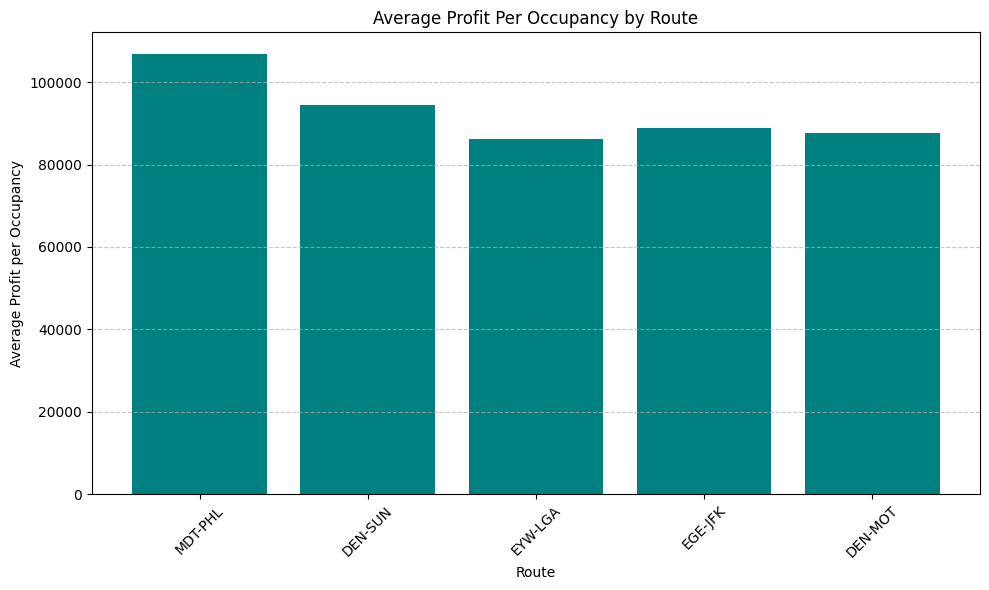

In [121]:
# Plotting the route vs profit for that route

plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(x['ROUND_TRIP'], x['Average_Profit'], color='teal')  # Create a bar plot

plt.title('Average Profit Per Occupancy by Route')  # Title of the plot
plt.xlabel('Route')  # X-axis label
plt.ylabel('Average Profit per Occupancy')  # Y-axis label
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding a grid for y-axis, for better readability of values

# Display the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

Investing in these routes will help the company reach profits and also aid in sustainability by utilizing their commitment and motto for customer service. These routes also help in maximizing profits along with maintaining reputation.

#### 4. The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend. Print key summary components for these routes.

In [87]:
upfront_airplane_cost = 90_000_000 #airplane cost

In [88]:
#Number of flights required for the breakeven can be found by diving the average profit

x['Break_Even_Flights'] = np.ceil(upfront_airplane_cost / x['Average_Profit']).astype(int)

In [89]:
x

,ROUND_TRIP,Average_Profit,Occupancy,Dep_Delay,Arr_Delay,Average_Overall_Delay,Score,Break_Even_Flights
0,MDT-PHL,106790.099219,0.649309,-3.888889,-6.261261,-10.150150,0.747740,843
1,EGE-JFK,88816.636667,0.653750,-3.437500,6.291667,2.854167,0.710056,1014
2,MIA-MKE,57020.060000,0.938014,-3.000000,-1.000000,-4.000000,0.706688,1579
3,EYW-LGA,86186.740000,0.850000,-3.333333,-29.333333,-32.666667,0.705595,1045
4,DEN-SUN,94381.307010,0.660000,-4.587629,-11.422680,-16.010309,0.685846,954


In [90]:
x.describe()

,Average_Profit,Occupancy,Dep_Delay,Arr_Delay,Average_Overall_Delay,Score,Break_Even_Flights
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000
mean,86638.968579,0.750215,-3.649470,-8.345122,-11.994592,0.711185,1087.00000
std,18359.182749,0.134955,0.613219,13.439729,13.520926,0.022534,285.64926
min,57020.060000,0.649309,-4.587629,-29.333333,-32.666667,0.685846,843.00000
25%,86186.740000,0.653750,-3.888889,-11.422680,-16.010309,0.705595,954.00000
50%,88816.636667,0.660000,-3.437500,-6.261261,-10.150150,0.706688,1014.00000
75%,94381.307010,0.850000,-3.333333,-1.000000,-4.000000,0.710056,1045.00000
max,106790.099219,0.938014,-3.000000,6.291667,2.854167,0.747740,1579.00000


In [91]:
print("Break-Even Analysis for Recommended Routes:")
for index, row in x.iterrows():
    print(f"\nRoute: {row['ROUND_TRIP']}")
    print(f"  Net Profit per Flight: ${row['Average_Profit']:,.2f}")
    print(f"  Break-Even Flights: {row['Break_Even_Flights']:,}")

Break-Even Analysis for Recommended Routes:

Route: MDT-PHL
  Net Profit per Flight: $106,790.10
  Break-Even Flights: 843

Route: EGE-JFK
  Net Profit per Flight: $88,816.64
  Break-Even Flights: 1,014

Route: MIA-MKE
  Net Profit per Flight: $57,020.06
  Break-Even Flights: 1,579

Route: EYW-LGA
  Net Profit per Flight: $86,186.74
  Break-Even Flights: 1,045

Route: DEN-SUN
  Net Profit per Flight: $94,381.31
  Break-Even Flights: 954


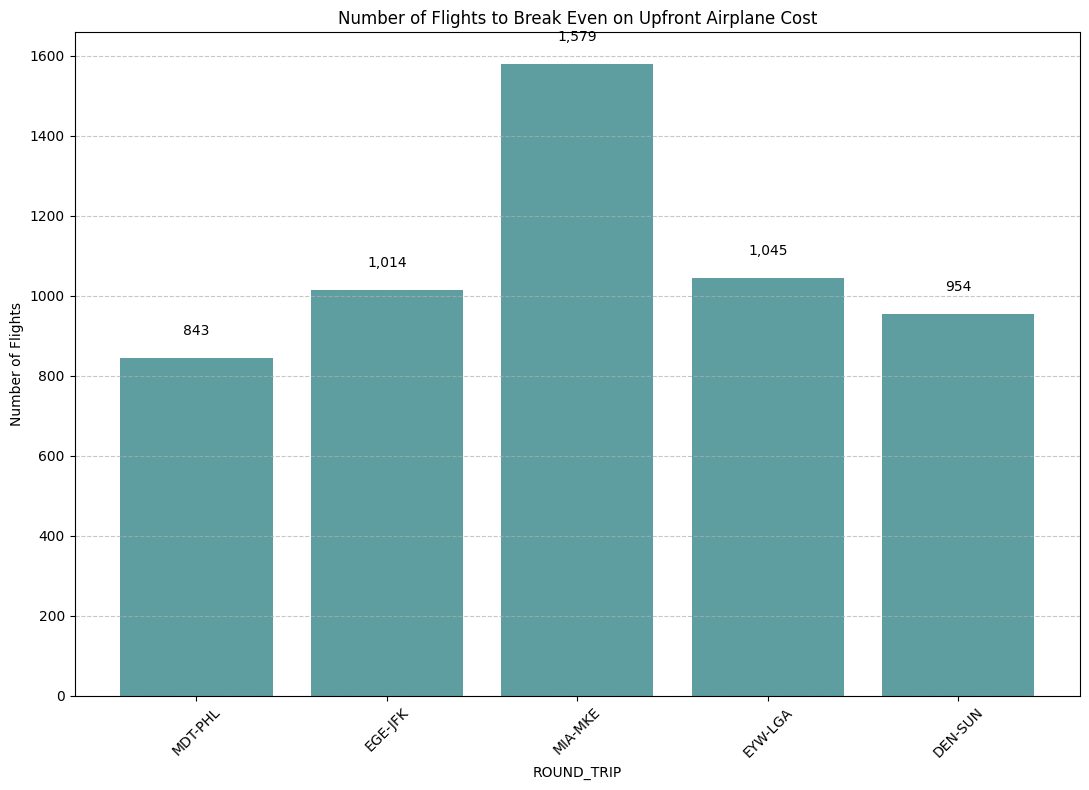

In [92]:
#plotting the number of flights required for the break even

plt.figure(figsize=(11, 8))
plt.bar(x['ROUND_TRIP'], x['Break_Even_Flights'], color='cadetblue')
plt.title('Number of Flights to Break Even on Upfront Airplane Cost')
plt.xlabel('ROUND_TRIP')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels to bars
for index, value in enumerate(x['Break_Even_Flights']):
    plt.text(index, value + 50, f'{value:,}', ha='center', va='bottom')  # adjust position based on actual scale

plt.tight_layout()
plt.show()

By investing in these routes, we can see that 850-1550 flights are needed to achieve breakeven. Most of the routes require fewer flights to break even. The airline company can invest in these routes, which will also help in achieving their future goals. Since these are not the busiest airports, it will reduce the cost of maintenance, and the flights can also be used to travel to other stations later.

#### 5. Key Performance Indicators (KPI’s) to track

Keeping the company's goal and motto in mind, I believe the following KPIs provide helpful information for better data analysis and trend identification.

1. **Profit Margin:** The profit margin is the percentage of revenue that is profit. It is a key indicator of the overall financial health of a route.

2. **On-Time Performance:** On-time performance refers to the percentage of flights that arrive and depart on time. This is a critical Key Performance Indicator (KPI) for the airline given its motto.

3. **Occupancy Rate:** The occupancy rate is the percentage of available seats that are filled with passengers on a flight. This is a critical metric indicating that more people are using the airline.

4. **Total Revenue:** Total revenue is the total amount of money generated from all sources associated with a route, including ticket sales, baggage fees, and other ancillary services.

5. **Total Cost:** The total cost is the total expenses incurred in operating a route, including fuel, maintenance, crew salaries, airport fees, and other operational costs.

6. **Ticket Fare:** Ticket fare refers to the price paid by passengers for a seat on a flight. This is a primary source of revenue for the airline and can vary based on factors like route, demand, and booking time.

### Step 7: Future Steps

1. Analyze how the occupancy rate is affected by arrival and departure delays.
2. Analyze how each OP_CARRIER is affecting the total revenue, total costs, and total profit. This analysis will help us understand if data discrepancies are generated by a particular carrier. If the delay is caused by the carrier, we could further analyze and draw conclusions related to costs.
3. Given our 5 recommended routes, we can further analyze the most flights to a destination from those (10) routes to better understand the competition.
4. We can further analyze the data where ARR_DELAY and DEP_DELAY values are negative, indicating that the flight arrived earlier and departed earlier than the actual time. This helps in strategizing operations, which in turn improves profits.
5. Upon brief examination of the data, I understood that there are some rows where airtime is less than 20 minutes. These rows mostly come from similar carriers. We can further analyze this to check if the carriers can move fast and reduce costs.

### Final Thoughts

As the goal of the analysis is to recommend the company 5 routes to invest in, with this analysis the company should invest in the following 5 routes.

1. MDT - PHL
2. EGE - JFK
3. DEN - SUN
4. MIA - MKE
5. EYW - LGA

It may not be a good idea to invest in busiest routes as they require more maintanence costs. So investing in the above routes not only helps in profit but also maintain the customer satisfaction.